# Theory
1. Problem: Estimate why do cactai grow in the parts of the desert. We don't really know what distinguishes high and low growth clusters. What is the ML system most suitable for the problem?
2. How can the lack of validation set create a bias in the fit measurement?
3. How can we reduce overfitting?

# Practice

In [6]:
# Run only once it will move work directory to  folder up. Use if needed.
import os
os.chdir('..')

In [7]:
print(os.getcwd())

/Users/vannyzhang


In [11]:
#1. Load dataset oecd_bli
import os
import pandas as pd
oecd_bli = pd.read_csv('datasets/lifesat/oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

FileNotFoundError: File b'datasets/lifesat/oecd_bli_2015.csv' does not exist

1 Plot the relationship Linear model predicting 'Life satisfaction' using 'Self-reported health' .

In [4]:
lifesat = pd.read_csv('/Users/vannyzhang/Desktop/Machine Learning/Data/datasets/lifesat/lifesat.csv')
lifesat.set_index("Country", inplace=True)
lifesat.head()
full_country_stats = pd.merge(left=oecd_bli, right=lifesat, left_index=True, right_index=True)
full_country_stats.head()

import numpy as np
X = np.c_[full_country_stats["Self-reported health"]]
y = np.c_[full_country_stats["Life satisfaction_y"]]

import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model (estimate)
model.fit(X, y)

t0, t1 = model.intercept_[0], model.coef_[0][0]
# Estimated coefficients
t0, t1
oecd_bli.plot(kind='scatter', x="Self-reported health", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 90, 0, 7.5])
X=np.linspace(0, 90, 100)
plt.plot(X, t0+t1*X, "r")

 2 Estimate and report relationship Linear model predicting  'Life satisfaction' using 'Self-reported health' .

In [5]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print('We predict that x and y have following relationship: y = {0}+{1}*x'.format(t0,t1))

We predict that x and y have following relationship: y = 4.196902047815998+0.03393977605164936*x


3 Plot regression line and scatter plot together

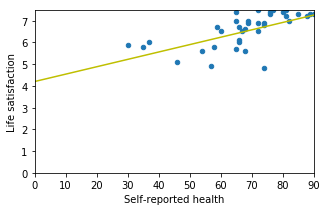

In [6]:
oecd_bli.plot(kind='scatter', x="Self-reported health", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 90, 0, 7.5])
X=np.linspace(0, 90, 100)
plt.plot(X, t0+t1*X, "y")

4 Drop all countries with the letter 'R' in the name and reestimate the relationship between  life satisfaction and Self-reported health.

In [59]:
#drop=list(full_country_stats.index)
#print(drop)
#part_country_stats=full_country_stats.drop("Russia")
#part_country_stats.head()
remove_indices = [0,1,4,7,8, 9,10,12,13,16,17,20,26]
keep_indices = list(set(range(28)) - set(remove_indices))
part_country_stats = full_country_stats[["Self-reported health", 'Life satisfaction_y']].iloc[keep_indices]
part_country_stats.head()

,Self-reported health,Life satisfaction_y
Country,,
Belgium,74.0,6.9
Canada,89.0,7.3
Estonia,54.0,5.6
Finland,65.0,7.4
Iceland,77.0,7.5


In [61]:
M = np.c_[part_country_stats["Self-reported health"]]
N = np.c_[part_country_stats["Life satisfaction_y"]]
model_1 = sklearn.linear_model.LinearRegression()
model_1.fit(M, N)
p0, p1 = model.intercept_[0], model.coef_[0][0]
print('We predict that M and N have following relationship: N = {0}+{1}*M'.format(p0,p1))

We predict that M and N have following relationship: N = 4.196902047815998+0.03393977605164936*M


5 Plot regression lines for all countries and countries with no R

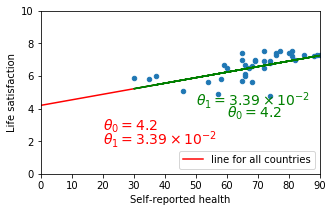

In [71]:
oecd_bli.plot(kind='scatter', x="Self-reported health", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 90, 0, 10])
X=np.linspace(0, 90, 100)
plt.plot(X, t0+t1*X, "r",label="line for all countries")
plt.text(20, 2.7, r"$\theta_0 = 4.2$", fontsize=14, color="r")
plt.text(20, 1.8, r"$\theta_1 = 3.39 \times 10^{-2}$", fontsize=14, color="r")
plt.plot(M, p0+p1*M, "g")
plt.text(60, 3.5, r"$\theta_0 = 4.2$", fontsize=14, color="g",label="line for countries with no r")
plt.text(50, 4.2, r"$\theta_1 = 3.39\times 10^{-2}$", fontsize=14, color="g")
plt.legend(loc="lower right")

In [63]:
#fcs=full_country_stats.index
#print(type(fcs))
#ric=fcs.str.contains('r')
#print(ric)

#full_country_stats = np.where(ric,fcs.str.replace('-',''))

#full_country_stats.index.str.replace(if ric==1,"")
#full_country_stats.head()

In [39]:
#new=full_country_stats.index.str.replace("r+","8")
#print(type(new))
#print(new)
#new_1=new.str.extract(r'^(\d{10})')
#print(new_1)
#new.head()

<class 'pandas.core.indexes.base.Index'>
Index(['Aust8alia', 'Aust8ia', 'Belgium', 'Canada', 'Denma8k', 'Estonia',
       'Finland', 'F8ance', 'Ge8many', 'G8eece', 'Hunga8y', 'Iceland',
       'I8eland', 'Is8ael', 'Italy', 'Japan', 'Ko8ea', 'Nethe8lands',
       'New Zealand', 'Poland', 'Po8tugal', 'Russia', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Tu8key', 'United Kingdom',
       'United States'],
      dtype='object', name='Country')
      0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
10  NaN
11  NaN
12  NaN
13  NaN
14  NaN
15  NaN
16  NaN
17  NaN
18  NaN
19  NaN
20  NaN
21  NaN
22  NaN
23  NaN
24  NaN
25  NaN
26  NaN
27  NaN
28  NaN
